In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [229]:
#%matplotlib widget
%matplotlib inline

In [230]:
#from platform import python_version
#python_version()

In [231]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [232]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'Berkeley_23'

## Getting RA&DEC from Bica 2019

In [233]:
df = pd.read_csv('../../lista.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]

## Querying the data

In [234]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [235]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [396]:
query = """SELECT 
source_id, ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.3))'

In [397]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [398]:
data = job.get_results()
len(data)

11749

In [399]:
#data

## Converting to pandas

In [400]:
df = data.to_pandas()
df

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,3373055383413425280,98.441260,20.747680,-0.113783,0.321765,-2.608369,0.227221,1.242405,18.702984,0.122085,0.296431,NaN,NaN,192.457198,5.590548
1,3373055383413425408,98.434755,20.750682,-6.808637,0.536744,-0.572507,0.387153,2.354786,19.443657,1.228666,0.493830,NaN,NaN,192.451741,5.586485
2,3373055383413425536,98.431414,20.751148,1.889621,0.145145,-4.012572,0.108935,1.315748,17.556522,0.546990,0.123857,NaN,NaN,192.449902,5.583910
3,3373055383413425664,98.442907,20.752486,-0.605242,0.061057,-1.393243,0.043518,0.614981,15.924734,0.313300,0.049999,NaN,NaN,192.453594,5.594098
4,3373055383413425920,98.432731,20.753766,2.436749,0.188481,-4.324244,0.138463,1.457268,17.817816,0.418652,0.162058,NaN,NaN,192.448117,5.586193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,3372970347356340864,98.080206,20.737406,0.480548,0.653681,-11.376843,0.489778,2.523804,19.824776,-0.319908,0.791748,NaN,NaN,192.312496,5.284995
11745,3372976222871597440,98.085998,20.745153,-2.233305,0.572290,1.048978,0.428020,2.433884,19.565348,-0.102673,0.691125,NaN,NaN,192.308039,5.293342
11746,3372976222873276288,98.087145,20.746562,NaN,NaN,NaN,NaN,1.041746,20.707432,NaN,NaN,NaN,NaN,192.307268,5.294937
11747,3372976252935768704,98.095831,20.753750,-0.877572,0.027988,-0.723776,0.020606,0.263605,12.320615,0.399989,0.027164,NaN,NaN,192.304547,5.305439


In [401]:
#import plotly.express as px

In [402]:
#fig = px.scatter(x = df.pmra_error, y = df.pmra)
#fig.show()

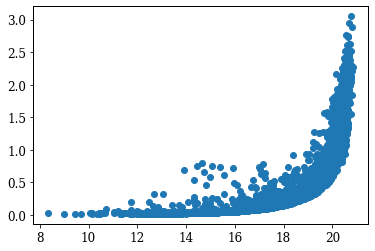

In [403]:
fig, ax = plt.subplots()

ax.scatter(df.phot_g_mean_mag, df.pmra_error)

## Applying better conditions to the variables

In [404]:
condicao = np.abs(0.5*df.pmra) < df.pmra_error
condicao2 = np.abs(0.5*df.pmdec) < df.pmdec_error
condicao3 = np.abs(0.5*df.parallax) < df.parallax_error


df_condicionado = df.drop(df[condicao|condicao2|condicao3].index) #
len(df_condicionado),len(df)

(4533, 11749)

## Dropping uknown values of pmra, pmdec or parallax.

In [405]:
ndf = df_condicionado.dropna(how='any',subset=['pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax', 'parallax_error'])
ndf

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
2,3373055383413425536,98.431414,20.751148,1.889621,0.145145,-4.012572,0.108935,1.315748,17.556522,0.546990,0.123857,NaN,NaN,192.449902,5.583910
3,3373055383413425664,98.442907,20.752486,-0.605242,0.061057,-1.393243,0.043518,0.614981,15.924734,0.313300,0.049999,NaN,NaN,192.453594,5.594098
4,3373055383413425920,98.432731,20.753766,2.436749,0.188481,-4.324244,0.138463,1.457268,17.817816,0.418652,0.162058,NaN,NaN,192.448117,5.586193
9,3373055387712350848,98.436289,20.755340,-2.173016,0.268122,-1.994538,0.189141,2.418791,18.343359,1.267195,0.240824,NaN,NaN,192.448221,5.589873
12,3373055417773165056,98.456313,20.762815,-1.309385,0.242640,-0.459034,0.188243,1.207232,18.089252,0.516454,0.207154,NaN,NaN,192.450044,5.609952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11738,3372966872727749888,98.261679,20.826320,-3.449370,0.388751,-7.699202,0.273683,1.904108,18.958904,1.042079,0.366475,NaN,NaN,192.310320,5.476534
11740,3372970209921237632,98.059181,20.718508,0.327385,0.026445,-4.250786,0.020256,0.927733,14.196066,0.609512,0.027350,40.257519,7.711147,192.320420,5.258888
11742,3372970343061189376,98.081852,20.739594,-0.887083,0.111859,-1.443877,0.087720,1.120966,17.093306,0.596035,0.108125,NaN,NaN,192.311241,5.287361
11743,3372970343061194624,98.083146,20.743295,1.587339,0.090589,-2.690212,0.067253,1.131142,16.739590,0.205295,0.089046,NaN,NaN,192.308483,5.290121


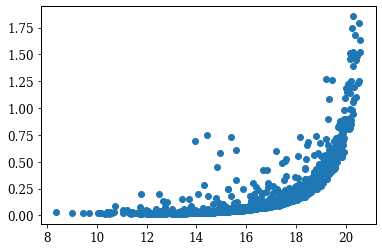

In [406]:
fig, ax = plt.subplots()

ax.scatter(ndf.phot_g_mean_mag, ndf.pmra_error)

In [407]:
#ndf.to_csv('ndf.csv', index=False)

## Determining the background

In [408]:
#.Definicão da função de correção de area
#.(calcula a parte da area de um círculo que esta fora das bordas da imagem)
def area_cor( radata, dedata, ap ):

    cosd = np.cos(dedata*np.pi/180.0)
    rarg = [min(radata),max(radata)]
    derg = [min(dedata),max(dedata)]
    
    b = np.array([(rarg[1]-radata)*cosd, (radata-rarg[0])*cosd, ap])
    c = np.array([ derg[1]-dedata, dedata-derg[0], ap ])
    b = np.min(b,axis=0)  ;  c = np.min(c,axis=0)
    P = 0.5*np.pi*ap**2 - c*np.sqrt(ap**2-c**2) - np.arcsin(c/ap)*ap**2
    Q = 0.5*np.pi*ap**2 - b*np.sqrt(ap**2-b**2) - np.arcsin(b/ap)*ap**2
    O = 0.5*( -c*np.sqrt(ap**2-c**2) - b*np.sqrt(ap**2-b**2) + \
     np.arccos(c/ap)*ap**2 - np.arcsin(b/ap)*ap**2) + c*b
    O = O*(abs(b) < np.sqrt(ap**2-c**2))
    area_cor = -P -Q +O
    return area_cor

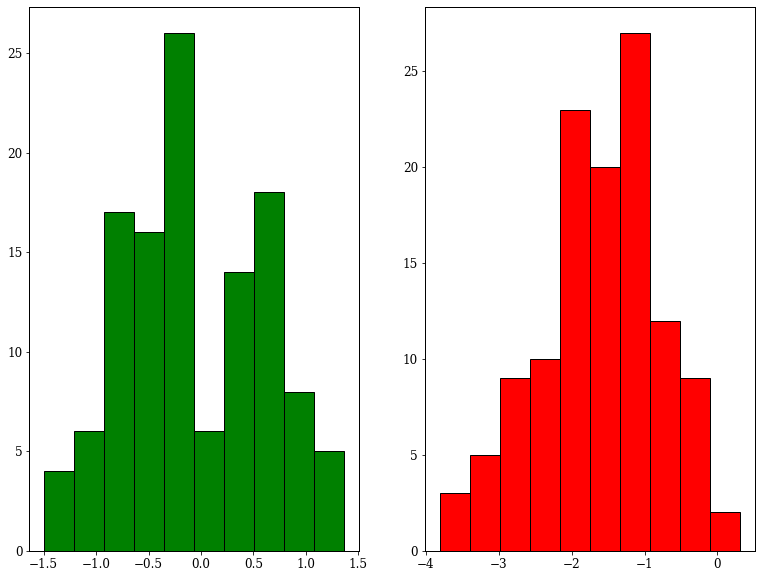

In [409]:
fig,ax  = plt.subplots(1,2,figsize=(13,10))



#optimal_bin = np.histogram_bin_edges(ndf['pmra'], bins = 'fd')
ax[0].hist(subset['pmra'],  ec = 'k', color = 'green');

#optimal_bin = np.histogram_bin_edges(ndf['pmdec'], bins = 'fd')
ax[1].hist(subset['pmdec'],  ec = 'k', color = 'red');




In [410]:
n2df = ndf.loc[(ndf.pmra<0.5) & (ndf.pmra > -0.6) & (ndf.pmdec < -1) & (ndf.pmdec > -1.8) ]
len(n2df)

179

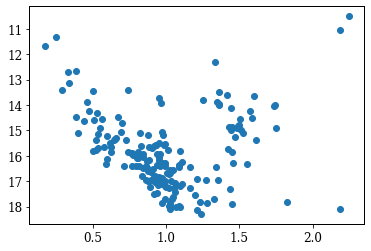

In [411]:
plt.scatter(n2df.bp_rp,n2df.phot_g_mean_mag)
plt.gca().invert_yaxis()

nan


/Users/jppirest/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


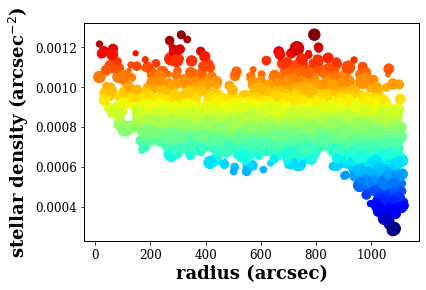

In [412]:
from astropy.coordinates import SkyCoord
from astropy import units
from sklearn.neighbors import NearestNeighbors


catalog = SkyCoord(ra=ndf['ra']*units.degree, dec=ndf['dec']*units.degree, frame='fk5')

nstar = len(ndf)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([ndf['ra'], ndf['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2 + area_cor(ndf.ra, ndf.dec, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(ndf['ra'], weights=den_data)
std_x = np.average((ndf['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(ndf['dec'], weights=den_data)
std_y = np.average((ndf['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')


norm_den = den_data/np.max(den_data)
bg_select = (norm_den > 0.04) & (norm_den < 0.15)
med_bg = np.median(den_data[bg_select])
std_bg = 0.5*med_bg

ax.axhline(med_bg, color = 'k')
print(med_bg)



In [413]:
raio_max = np.max(radii)*units.arcsec
raio_max = raio_max.to(units.radian).value
dens = med_bg
dens = dens*(1/units.arcsec*(1/units.arcsec))
dens = dens.to(1/units.sr).value
estrelas = len(df_condicionado) - dens*np.pi*raio_max**2
estrelas

nan

## Creating the arrays to perform the 5-D HDBSCAN fit

In [414]:
cincoD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]

## Performing the HDBSCAN

In [415]:
import hdbscan

In [416]:
from sklearn.preprocessing import RobustScaler

scaled = RobustScaler().fit_transform(cincoD)

Estimated no. of clusters: 1
Estimated no. of noise points: 3090
Estimated no. points clustered: 120


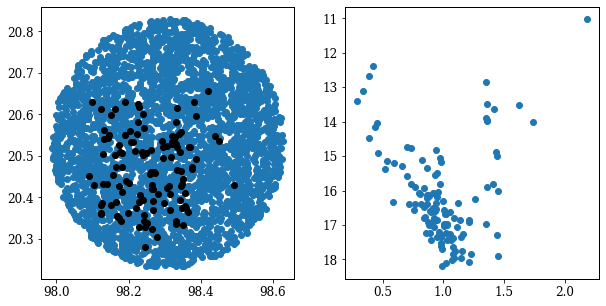

In [417]:
#pts_expected = int(estrelas)
pts_expected = 120

clusterer = hdbscan.HDBSCAN(min_cluster_size = pts_expected, min_samples = 100, allow_single_cluster=True, cluster_selection_method = 'eom', metric = 'euclidean').fit(scaled)


labels = clusterer.labels_


ndf = ndf.assign(labels=labels)


N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(clusterer.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(clusterer.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)

subset = ndf[ndf.labels == 0]


fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(subset.ra,subset.dec, color = 'k', zorder = 100)
ax[0].scatter(ndf.ra,ndf.dec)

ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


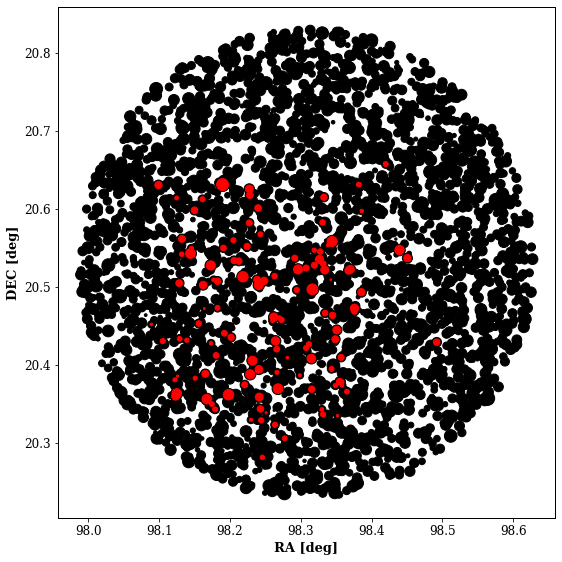

In [418]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(subset.ra,subset.dec,  s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, color = 'red', zorder = 100)
ax.scatter(ndf.ra,ndf.dec,  s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*20, color = 'k')
ax.set_xlabel('RA [deg]', fontweight = 'bold')
ax.set_ylabel('DEC [deg]', fontweight = 'bold')
plt.tight_layout()
plt.savefig('random_img.png', format = 'png', dpi = 300)


## Parameters

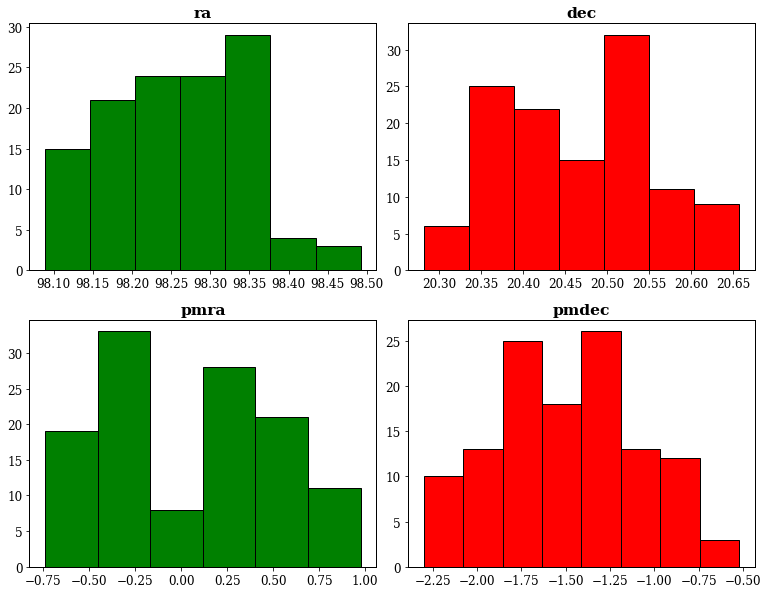

In [419]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


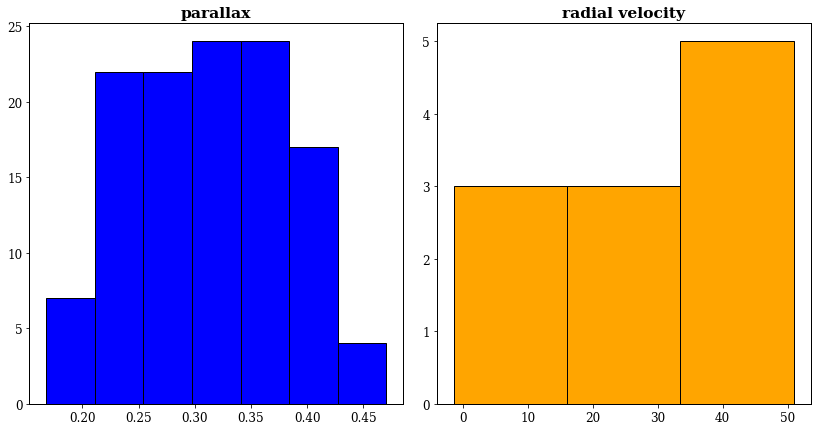

In [420]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Gaussian fit

In [421]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 7
    # variables        = 3
    chi-square         = 59.8495900
    reduced chi-square = 14.9623975
    Akaike info crit   = 21.0214710
    Bayesian info crit = 20.8592015
[[Variables]]
    amplitude:  6.62087502 +/- 0.71693435 (10.83%) (init = 6.040545)
    center:     0.31049923 +/- 0.01174373 (3.78%) (init = 0.3191409)
    sigma:      0.10053549 +/- 0.01372056 (13.65%) (init = 0.1006758)
    fwhm:       0.23674298 +/- 0.03230946 (13.65%) == '2.3548200*sigma'
    height:     26.2727836 +/- 2.63505623 (10.03%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.687


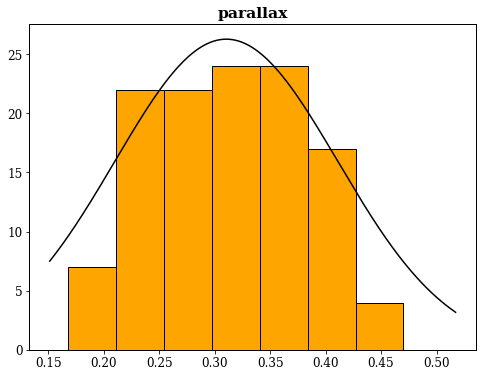

In [422]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0], histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(0.9*bins[0],1.1*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 7
    # variables        = 3
    chi-square         = 162.522843
    reduced chi-square = 40.6307107
    Akaike info crit   = 28.0143589
    Bayesian info crit = 27.8520893
[[Variables]]
    amplitude:  8.86865435 +/- 1.55915158 (17.58%) (init = 7.857404)
    center:     98.2499877 +/- 0.02475244 (0.03%) (init = 98.25703)
    sigma:      0.12898543 +/- 0.02839960 (22.02%) (init = 0.1007359)
    fwhm:       0.30373748 +/- 0.06687594 (22.02%) == '2.3548200*sigma'
    height:     27.4300848 +/- 4.41125193 (16.08%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.691
    C(center, sigma)     = -0.174
    C(amplitude, center) = -0.146


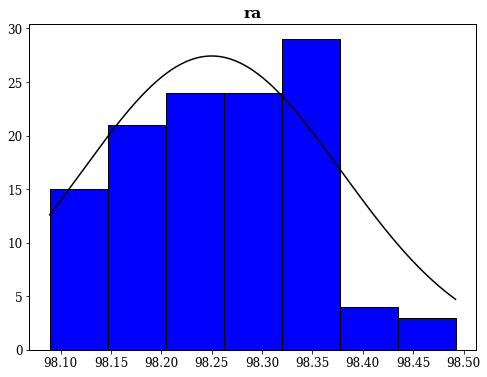

In [423]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 6
    # variables        = 3
    chi-square         = 394.501764
    reduced chi-square = 131.500588
    Akaike info crit   = 31.1151849
    Bayesian info crit = 30.4904633
[[Variables]]
    amplitude:  71.7258907 +/- 83.3593725 (116.22%) (init = 38.59532)
    center:    -0.25509527 +/- 1.04065194 (407.95%) (init = 0.1747244)
    sigma:      1.23777056 +/- 1.60294538 (129.50%) (init = 0.5146042)
    fwhm:       2.91472687 +/- 3.77464781 (129.50%) == '2.3548200*sigma'
    height:     23.1177673 +/- 6.91985009 (29.93%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.976
    C(amplitude, center) = -0.803
    C(center, sigma)     = -0.765


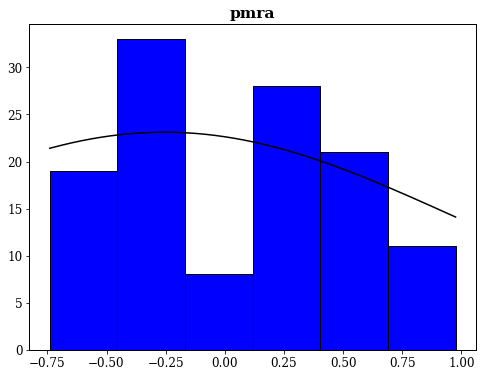

In [424]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 7
    # variables        = 3
    chi-square         = 301.928679
    reduced chi-square = 75.4821698
    Akaike info crit   = 32.3499648
    Bayesian info crit = 32.1876952
[[Variables]]
    amplitude:  8.56237688 +/- 2.34549717 (27.39%) (init = 7.327844)
    center:     20.4599563 +/- 0.03921031 (0.19%) (init = 20.42773)
    sigma:      0.14029642 +/- 0.04987408 (35.55%) (init = 0.09394672)
    fwhm:       0.33037281 +/- 0.11744448 (35.55%) == '2.3548200*sigma'
    height:     24.3476945 +/- 5.73495598 (23.55%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.749


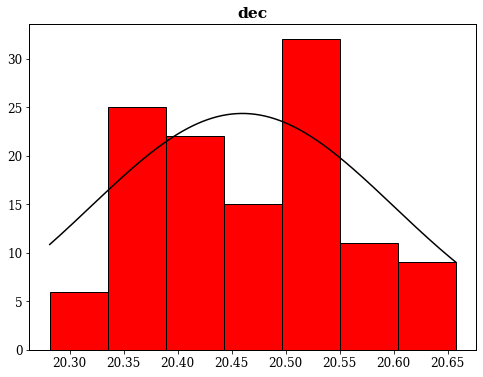

In [425]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 8
    # variables        = 3
    chi-square         = 90.4174637
    reduced chi-square = 18.0834927
    Akaike info crit   = 25.3999671
    Bayesian info crit = 25.6382917
[[Variables]]
    amplitude:  33.0982876 +/- 4.17886789 (12.63%) (init = 17.5482)
    center:    -1.52628696 +/- 0.07758600 (5.08%) (init = -1.538837)
    sigma:      0.56442775 +/- 0.08924644 (15.81%) (init = 0.2543218)
    fwhm:       1.32912575 +/- 0.21015931 (15.81%) == '2.3548200*sigma'
    height:     23.3941493 +/- 2.73695588 (11.70%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.683
    C(center, sigma)    = -0.114


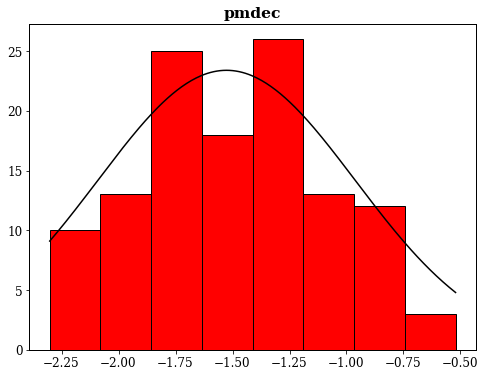

In [426]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 8000
    # data points      = 3
    # variables        = 3
    chi-square         = 0.48528762
    reduced chi-square = 0.48528762
    Akaike info crit   = 0.53512255
    Bayesian info crit = -2.16904059
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amplitude:  5.5799e+18 (init = 52.23853)
    center:     6003.67977 (init = 50.90554)
    sigma:      720.832160 (init = 8.706421)
    fwhm:       1697.42999 == '2.3548200*sigma'
    height:     3.0882e+15 == '0.3989423*amplitude/max(1e-15, sigma)'


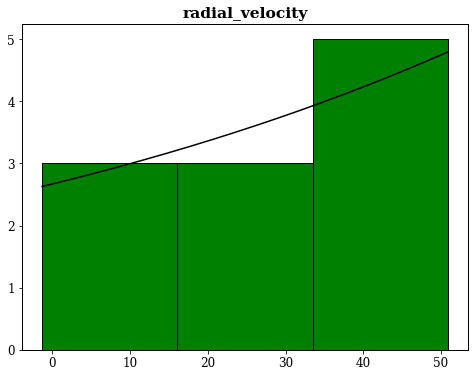

In [427]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()

## Sigma Clipping

120
109
109
109
109


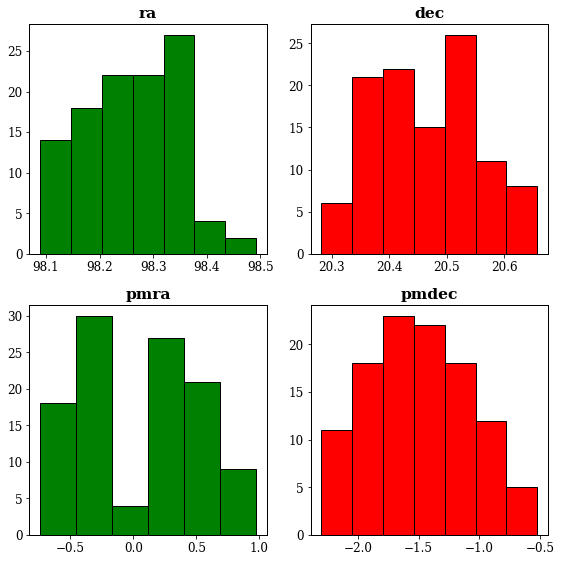

In [428]:
gmodel = GaussianModel()
clip_loop = subset

for i in range(4):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 2

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]
    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]
    dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]
    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down) & (clip_loop.ra>ra_down) & (clip_loop.ra<ra_up) & 
                              (clip_loop.dec>dec_down) & (clip_loop.dec<dec_up) & (clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) 
                              & (clip_loop.pmdec<pmdec_up)  & (clip_loop.radial_velocity.isnull() | (clip_loop.radial_velocity>radvel_down) & (clip_loop.radial_velocity<radvel_up)) ]

    
print(len(clip_loop))

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax1.hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax2.hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax3.hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax4.hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.tight_layout()
#plt.savefig('teste_params.png', format = 'png', dpi = 300)


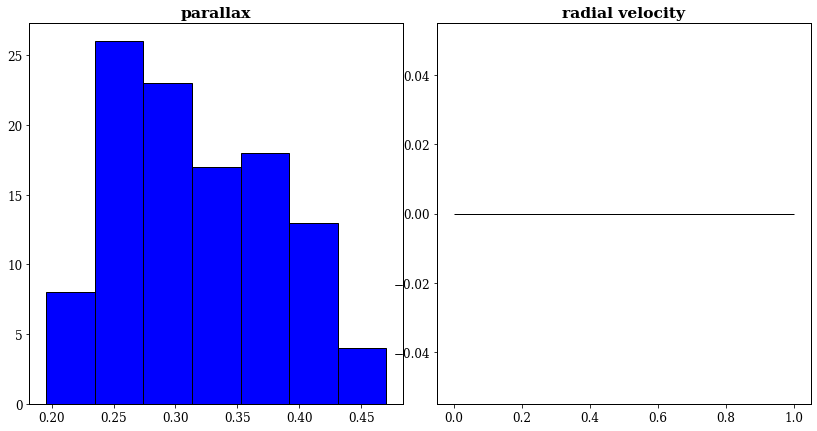

In [429]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(clip_loop['parallax'], bins = 'fd')
ax1.hist(clip_loop['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## FINAL RESULTS

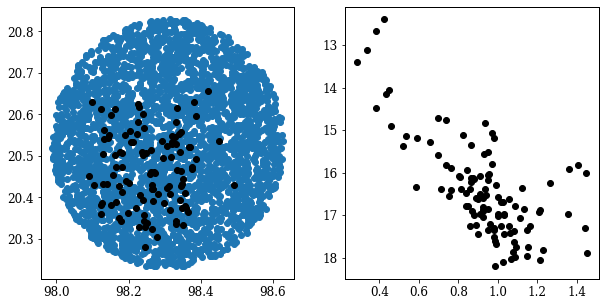

In [430]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(clip_loop.ra,clip_loop.dec, color = 'k', zorder = 100)
ax[0].scatter(ndf.ra,ndf.dec)


ax[1].scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'], color = 'k')
ax[1].invert_yaxis()

In [431]:
from astropy.coordinates import Distance

teste =  Distance(parallax=clip_loop['parallax'].to_numpy()*units.mas)

np.min(teste), np.max(teste)

(<Distance 2126.96041151 pc>, <Distance 5107.14438996 pc>)

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

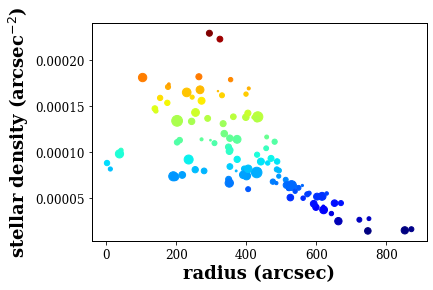

In [432]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



In [433]:
clip_loop.to_csv('final_5d.csv', index=False)

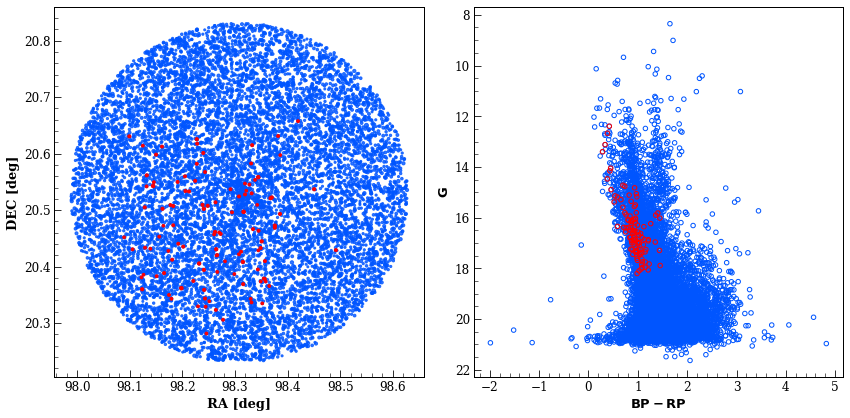

In [434]:
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))


ax1.scatter(df['ra'],df['dec'], color = '#0055FF',s=(25-df.phot_g_mean_mag), alpha = 0.8)
ax1.scatter(clip_loop['ra'],clip_loop['dec'], color = 'red', s=(25-clip_loop.phot_g_mean_mag), zorder = 10)
ax1.set_ylabel('DEC [deg]', fontweight = 'bold')
ax1.set_xlabel('RA [deg]', fontweight = 'bold')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax1.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)




ax2.scatter(df['bp_rp'],df['phot_g_mean_mag'], color = 'None', edgecolor = '#0055FF', s = 20)
ax2.scatter(clip_loop['bp_rp'], clip_loop['phot_g_mean_mag'], color = 'None', edgecolor = 'red', s =20)
ax2.set_xlabel('BP - RP', fontweight = 'bold')
ax2.set_ylabel('G', fontweight = 'bold')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')
#ax2.grid()

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
#plt.savefig('teste.jpg', format = 'jpg', dpi = 300)

In [435]:
cantat_table = pd.read_csv('table-cantat.csv')
#cantat_table.head()

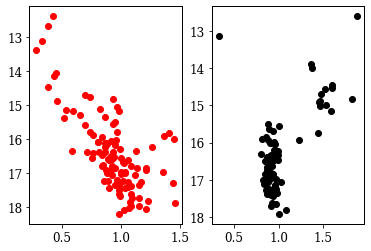

In [436]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))

ax1.scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'], color = 'red')
ax2.scatter(cantat_table['BP-RP'],cantat_table['Gmag'], color = 'k')
ax1.invert_yaxis()
ax2.invert_yaxis()

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

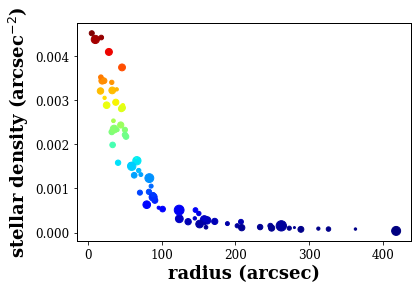

In [437]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=cantat_table['_RAJ2000']*units.degree, dec=cantat_table['_DEJ2000']*units.degree, frame='fk5')

nstar = len(cantat_table)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([cantat_table['_RAJ2000']*np.cos(cantat_table['_DEJ2000']*np.pi/180.0), cantat_table['_DEJ2000']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(cantat_table['_RAJ2000'], weights=den_data)
std_x = np.average((cantat_table['_RAJ2000']-med_x)**2, weights=den_data)**0.5

med_y = np.average(cantat_table['_DEJ2000'], weights=den_data)
std_y = np.average((cantat_table['_DEJ2000']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(cantat_table['Gmag'])-cantat_table['Gmag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



## PARAMETERS

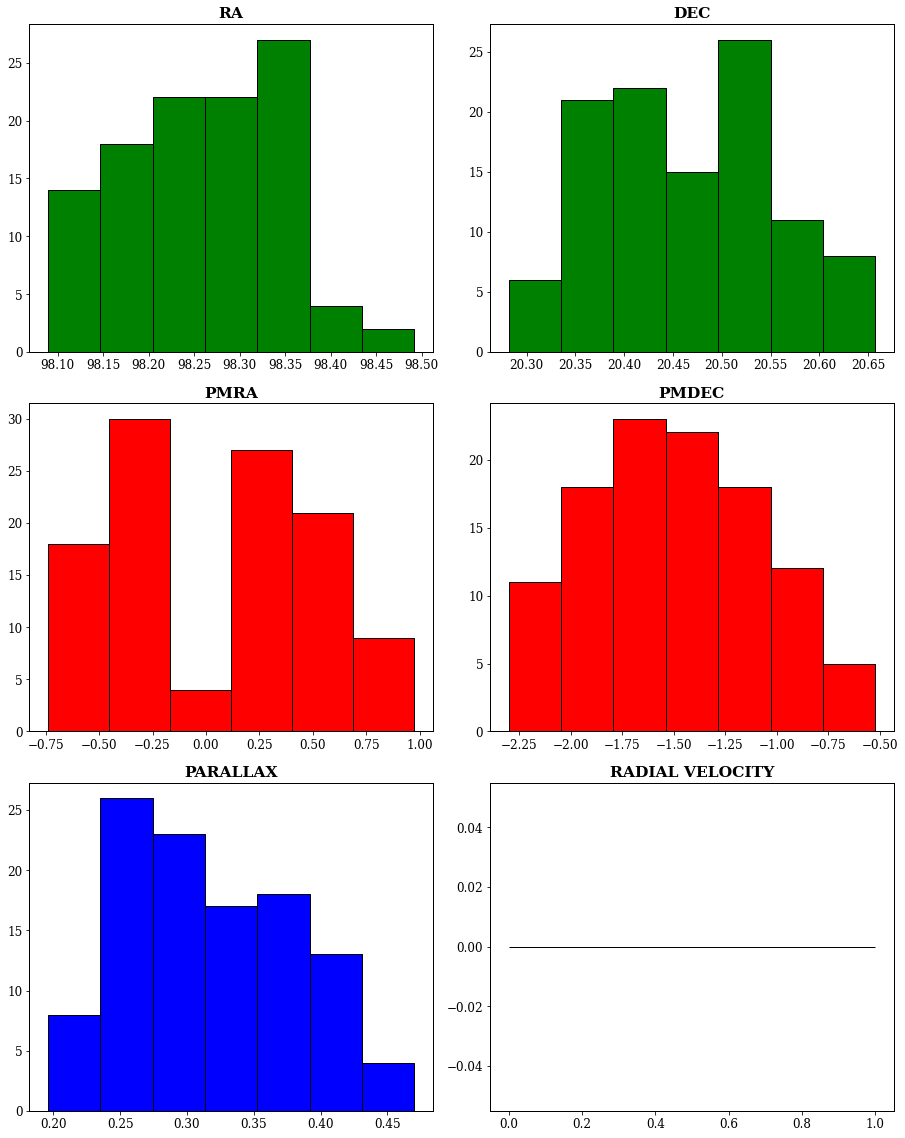

In [438]:
fig, ax = plt.subplots(3,2, figsize=(12.8,16))


optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax[0,0].hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');
ax[0,0].set_title('RA', fontweight = 'bold')


optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax[1,0].hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'red');
ax[1,0].set_title('PMRA', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax[0,1].hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'green');
ax[0,1].set_title('DEC', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax[1,1].hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');
ax[1,1].set_title('PMDEC', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['parallax'], bins = 'fd')
ax[2,0].hist(clip_loop['parallax'], optimal_bin, ec = 'k',color = 'blue');
ax[2,0].set_title('PARALLAX', fontweight = 'bold')

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax[2,1].hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');
ax[2,1].set_title('RADIAL VELOCITY', fontweight = 'bold')
plt.tight_layout()
plt.savefig('params_ngc2420.png', format = 'png', dpi = 300)


In [439]:
for i in range(1):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


109


In [440]:
valores_ra, valores_dec

([98.25301859506627, 0.12753958710600033],
 [20.45702114782534, 0.13781037558515985])

In [441]:
valores_pmra,valores_pmdec

([-0.295898803921604, 1.3591682424167333],
 [-1.5581689269100933, 0.6145154623295837])

In [442]:
valores_paralaxe

[0.30016659000474194, 0.09770311842937951]

TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=1

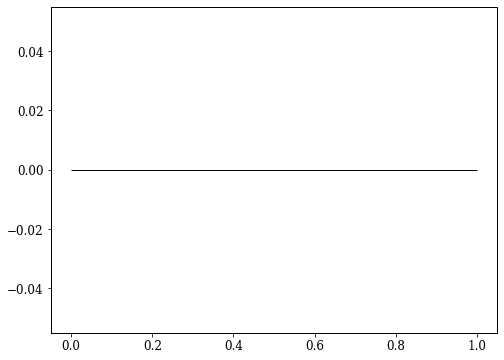

In [443]:
ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

fig, ax = plt.subplots(figsize=(8,6))


data = ra_vel['radial_velocity']

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue')

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radvel', fontweight = 'bold')

plt.show()

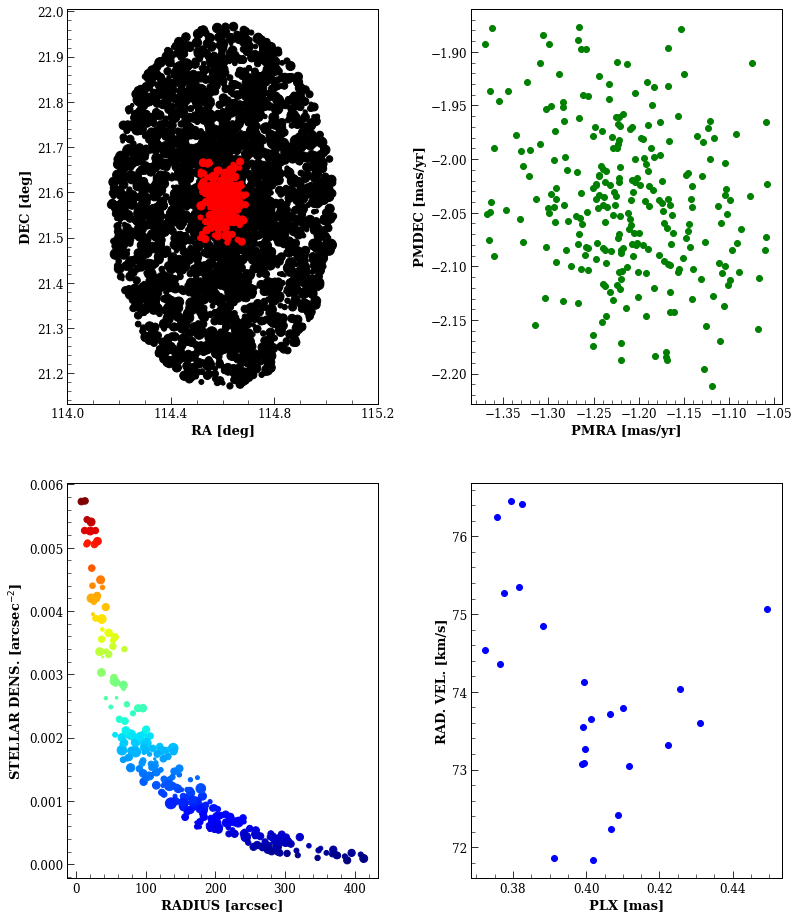

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12.8,16))

ax[0,0].scatter(clip_loop.ra, clip_loop.dec, color = 'red', s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, zorder = 100)
ax[0,0].scatter(ndf.ra, ndf.dec, color = 'k', s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*15)
ax[0,0].set_xlabel('RA [deg]', fontweight = 'bold')
ax[0,0].set_ylabel('DEC [deg]', fontweight = 'bold')
#ax[0,0].set_xlim(114.4,114.8)
#ax[0,0].set_ylim(21.4,21.8)


ax[0,1].scatter(clip_loop.pmra, clip_loop.pmdec, color = 'green')
ax[0,1].set_xlabel('PMRA [mas/yr]', fontweight = 'bold')
ax[0,1].set_ylabel('PMDEC [mas/yr]', fontweight = 'bold')


ax[1,1].scatter(ra_vel.parallax, ra_vel.radial_velocity, color = 'blue')
ax[1,1].set_xlabel('PLX [mas]', fontweight = 'bold')
ax[1,1].set_ylabel('RAD. VEL. [km/s]', fontweight = 'bold')


ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[1,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)



from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')


ax[1,0].scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, c=den_data/3600**2, cmap = cor)
ax[1,0].set_xlabel('RADIUS [arcsec]', fontweight='bold')
ax[1,0].set_ylabel('STELLAR DENS. [arcsec$^{-2}$]', fontweight='bold')


ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


ax[0,0].set_xticks(ax[0,0].get_xticks()[::2])



plt.subplots_adjust(hspace=0.2, wspace = 0.3)
#plt.savefig('ngc2420_3plot.png', format = 'png', dpi = 300)


## Sigma Clippinh Only VPD and plx

In [447]:
gmodel = GaussianModel()
clip_loop = subset


print(len(clip_loop))

j = 1

for i in range(j):
    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]
    
    sigma = 1

    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]

    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]

    clip_loop = clip_loop.loc[(clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) 
                              & (clip_loop.pmdec<pmdec_up)]

    
print(len(clip_loop))

gmodel = GaussianModel()

for i in range(1):

    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 1

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down)]







120
95


In [ ]:
#clip_loop.to_csv('final_semradec.csv', index = False)

In [453]:
np.mean(cantat_table['RV'])

51.85333527995532

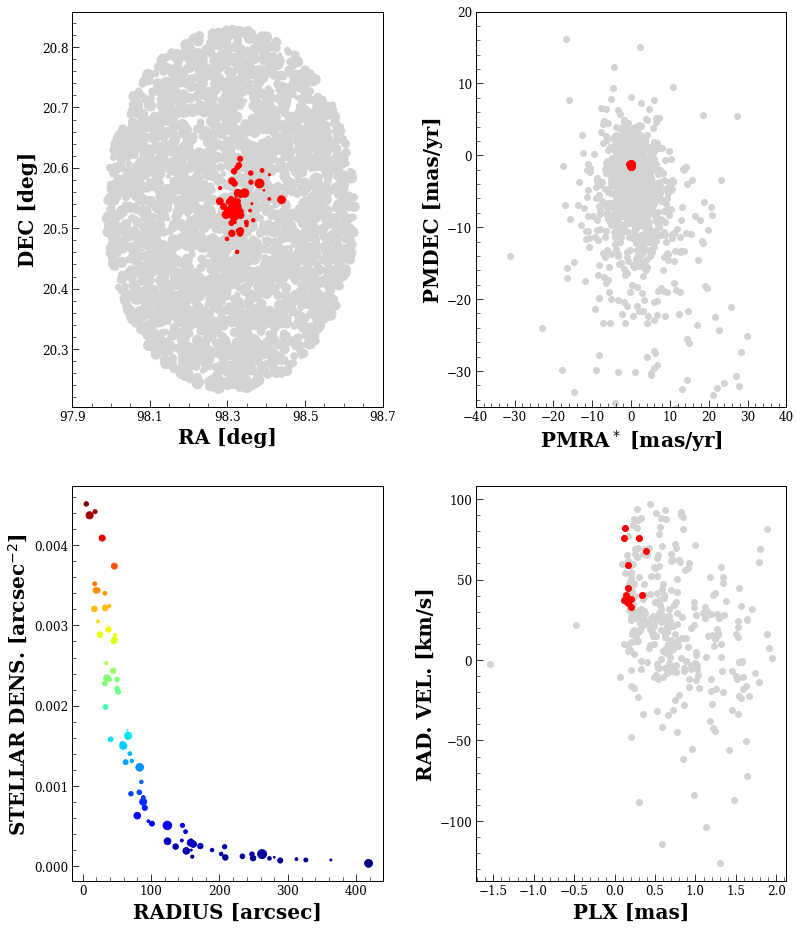

In [485]:
fig, ax = plt.subplots(2,2, figsize=(12.8,16))

clip_loop = pd.read_csv('table-cantat.csv')
ax[0,0].scatter(clip_loop['RA_ICRS'], clip_loop['DE_ICRS'], color = 'red', s=(max(clip_loop['Gmag'])-clip_loop['Gmag'])*15, zorder = 100)
ax[0,0].scatter(ndf.ra, ndf.dec, color = 'lightgray', s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*15)
ax[0,0].set_xlabel('RA [deg]', fontweight = 'bold', fontsize = 20)
ax[0,0].set_ylabel('DEC [deg]', fontweight = 'bold',fontsize = 20)
#ax[0,0].set_xlim(114.3,114.9)
#ax[0,0].set_ylim(21.3,21.9)


ax[0,1].scatter(clip_loop['pmRA*'], clip_loop['pmDE'], color = 'red', zorder= 100)
ax[0,1].scatter(ndf.pmra, ndf.pmdec, color = 'lightgray')
ax[0,1].set_xlabel('PMRA$^*$ [mas/yr]', fontweight = 'bold', fontsize = 20)
ax[0,1].set_ylabel('PMDEC [mas/yr]', fontweight = 'bold', fontsize = 20)
ax[0,1].set_xlim(-40,40)
ax[0,1].set_ylim(-35,20)

clip_loop = pd.read_csv('final_semradec.csv')
ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
ra_vel_ndf = ndf.dropna(how='any',subset=['radial_velocity'])
ra_vel_ndf = ra_vel_ndf.loc[ra_vel_ndf.parallax <2]


ax[1,1].scatter(ra_vel.parallax, ra_vel.radial_velocity, color = 'red', zorder= 100)
ax[1,1].scatter(ra_vel_ndf.parallax, ra_vel_ndf.radial_velocity, color = 'lightgray')
ax[1,1].set_xlabel('PLX [mas]', fontweight = 'bold', fontsize = 20)
ax[1,1].set_ylabel('RAD. VEL. [km/s]', fontweight = 'bold', fontsize = 20)


ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[1,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

clip_loop = pd.read_csv('table-cantat.csv')




from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['RA_ICRS']*units.degree, dec=clip_loop['DE_ICRS']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['RA_ICRS']*np.cos(clip_loop['DE_ICRS']*np.pi/180.0), clip_loop['DE_ICRS']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['RA_ICRS'], weights=den_data)
std_x = np.average((clip_loop['RA_ICRS']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['DE_ICRS'], weights=den_data)
std_y = np.average((clip_loop['DE_ICRS']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')


ax[1,0].scatter(radii,den_data, s=(max(clip_loop['Gmag'])-clip_loop['Gmag'])*15, c=den_data/3600**2, cmap = cor)
ax[1,0].set_xlabel('RADIUS [arcsec]', fontweight='bold', fontsize = 20)
ax[1,0].set_ylabel('STELLAR DENS. [arcsec$^{-2}$]', fontweight='bold', fontsize = 20)


ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


ax[0,0].set_xticks(ax[0,0].get_xticks()[::2])



plt.subplots_adjust(hspace=0.2, wspace = 0.3)
plt.savefig('be23_3plot.png', format = 'png', dpi = 300)


## Clipping redondo

In [ ]:
gmodel = GaussianModel()

data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
numero, bins = np.histogram(data, optimal_bin)
teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
inicial = gmodel.guess(numero, x = teste)
result = gmodel.fit(numero, inicial, x=teste)
valores_pmra = [result.params['center'].value, result.params['sigma'].value]

gmodel = GaussianModel()

data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
numero, bins = np.histogram(data, optimal_bin)
teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
inicial = gmodel.guess(numero, x = teste)
result = gmodel.fit(numero, inicial, x=teste)
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

r1sigma = np.sqrt(4*valores_pmra[1]**2 + 4*valores_pmdec[1]**2)

In [ ]:
rs = np.zeros(len(subset))

for i in range(len(subset)):
    star = subset.iloc[i]
    distancia = np.sqrt((valores_pmra[0] - star.pmra)**2 + (valores_pmdec[0]-star.pmdec)**2)
    rs[i] = distancia


In [ ]:
teste = subset.assign(rs=rs)
teste_final = teste.loc[rs<=r1sigma]
print(len(teste_final))


100


In [ ]:
for i in range(1):
    data = teste_final['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 3

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    

    radvel_up, radvel_down = valores_radial_velocity[0] + 0.5*sigma*valores_radial_velocity[1], valores_radial_velocity[0] - 0.5*sigma*valores_radial_velocity[1]
    teste_final= teste_final.loc[(teste_final.parallax < paralaxe_up ) & (teste_final.parallax > paralaxe_down)  & (teste_final.radial_velocity.isnull() | (teste_final.radial_velocity>radvel_down) & (teste_final.radial_velocity<radvel_up)) ]
    
print(len(teste_final))

93


In [ ]:
cantat_table

,_RAJ2000,_DEJ2000,_r,RA_ICRS,DE_ICRS,GaiaDR2,Plx,pmRA*,pmDE,RV,o_Gmag,Gmag,BP-RP,proba,Cluster,Teff50,Simbad,_RA.icrs,_DE.icrs
0,98.324812,20.460869,0.094913,98.324813,20.460864,3372760443716362880,0.254129,0.077951,-1.294193,NaN,149,17.071100,1.028212,0.9,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6669.7640,Simbad,98.324812,20.460869
1,98.298854,20.482397,0.091550,98.298853,20.482391,3372763536092816512,0.297958,-0.173129,-1.180195,NaN,139,17.058401,0.882166,0.8,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6191.0880,Simbad,98.298854,20.482397
2,98.311415,20.491585,0.076730,98.311416,20.491579,3372763570452552064,0.138133,0.234722,-1.465398,NaN,126,15.158511,1.582512,0.9,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,4688.7114,Simbad,98.311415,20.491585
3,98.332742,20.491120,0.064750,98.332742,20.491116,3372763600514126464,0.268948,-0.059151,-1.020777,NaN,149,15.984170,0.951128,0.7,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6768.1567,Simbad,98.332742,20.491120
4,98.327780,20.495945,0.063384,98.327780,20.495940,3372763600514134656,0.156389,-0.003599,-1.349942,NaN,147,16.979843,0.903271,0.9,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6247.0723,Simbad,98.327780,20.495945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,98.325245,20.600564,0.067773,98.325246,20.600558,3372770854717063168,-0.045199,0.049957,-1.253649,NaN,120,16.457760,0.989761,0.9,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6590.8560,Simbad,98.325245,20.600564
71,98.281331,20.566614,0.084315,98.281329,20.566608,3372770884778797440,0.043237,-0.446635,-1.230731,NaN,121,17.263770,0.947412,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,7977.6895,Simbad,98.281331,20.566614
72,98.317095,20.594195,0.067997,98.317095,20.594189,3372771056577527936,0.201164,-0.060376,-1.312772,NaN,121,15.943562,1.226039,0.9,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,5361.8320,Simbad,98.317095,20.594195
73,98.329602,20.604287,0.068518,98.329601,20.604281,3372771228376232704,0.138919,-0.196911,-1.320980,NaN,135,16.011356,0.900497,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6768.9910,Simbad,98.329602,20.604287


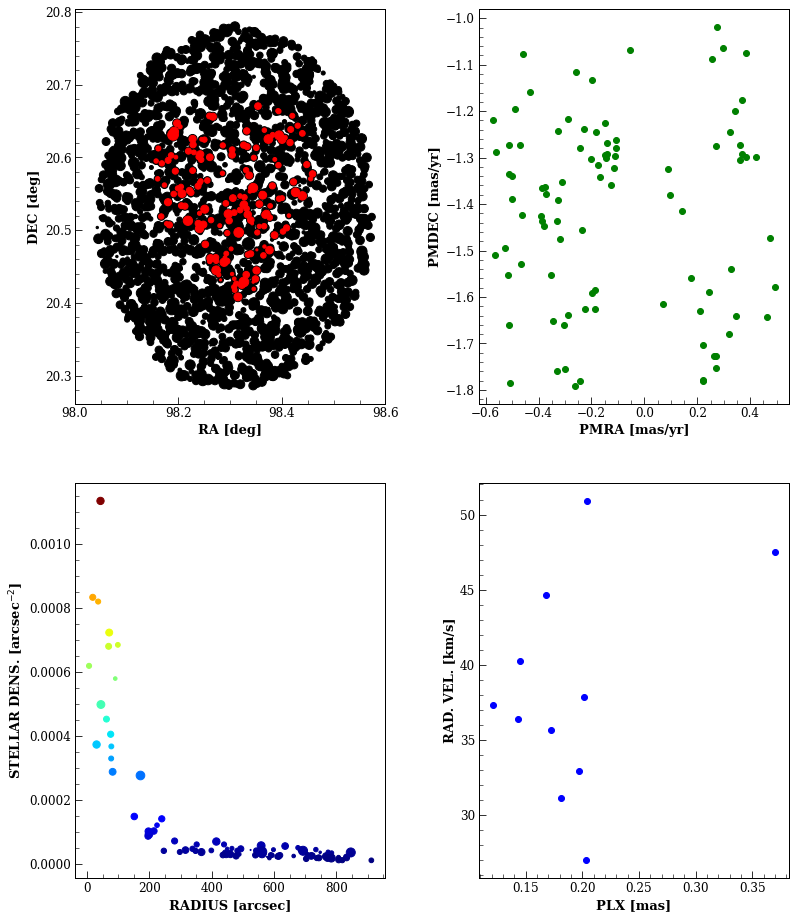

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(12.8,16))

#ax[0,0].scatter(teste_final.ra, teste_final.dec, color = 'red', s=(max(teste_final['phot_g_mean_mag'])-teste_final['phot_g_mean_mag'])*15, zorder = 100)
ax[0,0].scatter(clip_loop.ra, clip_loop.dec, color = 'red', s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, zorder = 100)
#ax[0,0].scatter(cantat_table.RA_ICRS, cantat_table.DE_ICRS , zorder = 100, s = 100)
ax[0,0].scatter(ndf.ra, ndf.dec, color = 'k', s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*15)
ax[0,0].set_xlabel('RA [deg]', fontweight = 'bold')
ax[0,0].set_ylabel('DEC [deg]', fontweight = 'bold')



ax[0,1].scatter(teste_final.pmra, teste_final.pmdec, color = 'green')
ax[0,1].set_xlabel('PMRA [mas/yr]', fontweight = 'bold')
ax[0,1].set_ylabel('PMDEC [mas/yr]', fontweight = 'bold')

ra_vel = teste_final.dropna(how='any',subset=['radial_velocity'])

ax[1,1].scatter(ra_vel.parallax, ra_vel.radial_velocity, color = 'blue')
ax[1,1].set_xlabel('PLX [mas]', fontweight = 'bold')
ax[1,1].set_ylabel('RAD. VEL. [km/s]', fontweight = 'bold')


ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[1,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=teste_final['ra']*units.degree, dec=teste_final['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([teste_final['ra']*np.cos(teste_final['dec']*np.pi/180.0), teste_final['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(teste_final['ra'], weights=den_data)
std_x = np.average((teste_final['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(teste_final['dec'], weights=den_data)
std_y = np.average((teste_final['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')


ax[1,0].scatter(radii,den_data, s=(max(teste_final['phot_g_mean_mag'])-teste_final['phot_g_mean_mag'])*15, c=den_data/3600**2, cmap = cor)
ax[1,0].set_xlabel('RADIUS [arcsec]', fontweight='bold')
ax[1,0].set_ylabel('STELLAR DENS. [arcsec$^{-2}$]', fontweight='bold')


ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


ax[0,0].set_xticks(ax[0,0].get_xticks()[::2])



plt.subplots_adjust(hspace=0.2, wspace = 0.3)
#plt.savefig('ngc2420_3plot.png', format = 'png', dpi = 300)





In [ ]:
teste_final.to_csv('raio_vpd.csv', index = False)